# Contents

### Exploring Relationships
     1. Correlations
     2. Pair Plots
     3. Categorical Plots

In [6]:
# import libraries and data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [8]:
tfire = pd.read_csv( r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data\Fire_Incidents_Cleaned.csv")

In [10]:
# check for latest version of matplotlib

matplotlib.__version__

'3.8.4'

In [12]:
# ensure the charts displayed in the notebook without the need to call them specifically.

%matplotlib inline

### Correlations

In [57]:
numeric_tfire = tfire.select_dtypes(include=[np.number])
correlation = numeric_tfire.corr()

In [61]:
correlation

,Unnamed: 0,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
Unnamed: 0,1.000000,-0.094039,-0.110103,-0.002170,0.017100,0.014963,0.182993,0.003618,-0.015857
Civilian_Casualties,-0.094039,1.000000,0.156616,0.013654,0.032549,0.008302,-0.025343,0.016714,-0.023605
Count_of_Persons_Rescued,-0.110103,0.156616,1.000000,0.013145,0.007879,-0.007454,-0.003205,-0.000317,-0.003656
Estimated_Dollar_Loss,-0.002170,0.013654,0.013145,1.000000,0.115060,0.014203,-0.015589,-0.000073,-0.009601
Estimated_Number_Of_Persons_Displaced,0.017100,0.032549,0.007879,0.115060,1.000000,0.003744,-0.005313,0.004682,-0.001174
Incident_Station_Area,0.014963,0.008302,-0.007454,0.014203,0.003744,1.000000,-0.385451,-0.640543,-0.433746
Incident_Ward,0.182993,-0.025343,-0.003205,-0.015589,-0.005313,-0.385451,1.000000,0.329026,0.896123
Latitude,0.003618,0.016714,-0.000317,-0.000073,0.004682,-0.640543,0.329026,1.000000,0.319093
Longitude,-0.015857,-0.023605,-0.003656,-0.009601,-0.001174,-0.433746,0.896123,0.319093,1.000000


In [71]:
# Drop any column with 'Unnamed:' in its name

numeric_tfire = numeric_tfire.loc[:, ~numeric_tfire.columns.str.contains('^Unnamed')]

In [77]:
# check column dropped

numeric_tfire.columns

Index(['Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Incident_Station_Area', 'Incident_Ward', 'Latitude', 'Longitude'],
      dtype='object')

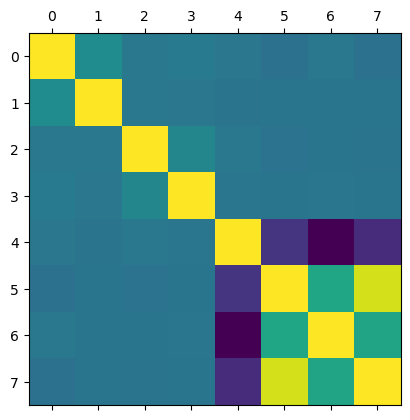

In [79]:
# create a correlation heat map

plt.matshow(numeric_tfire.corr())
plt.show()

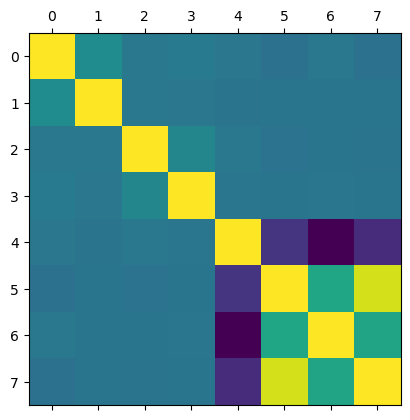

In [81]:
# save figure

plt.matshow(numeric_tfire.corr())
plt.savefig('correlations.png')

Text(0.5, 1.0, 'Correlation Matrix')

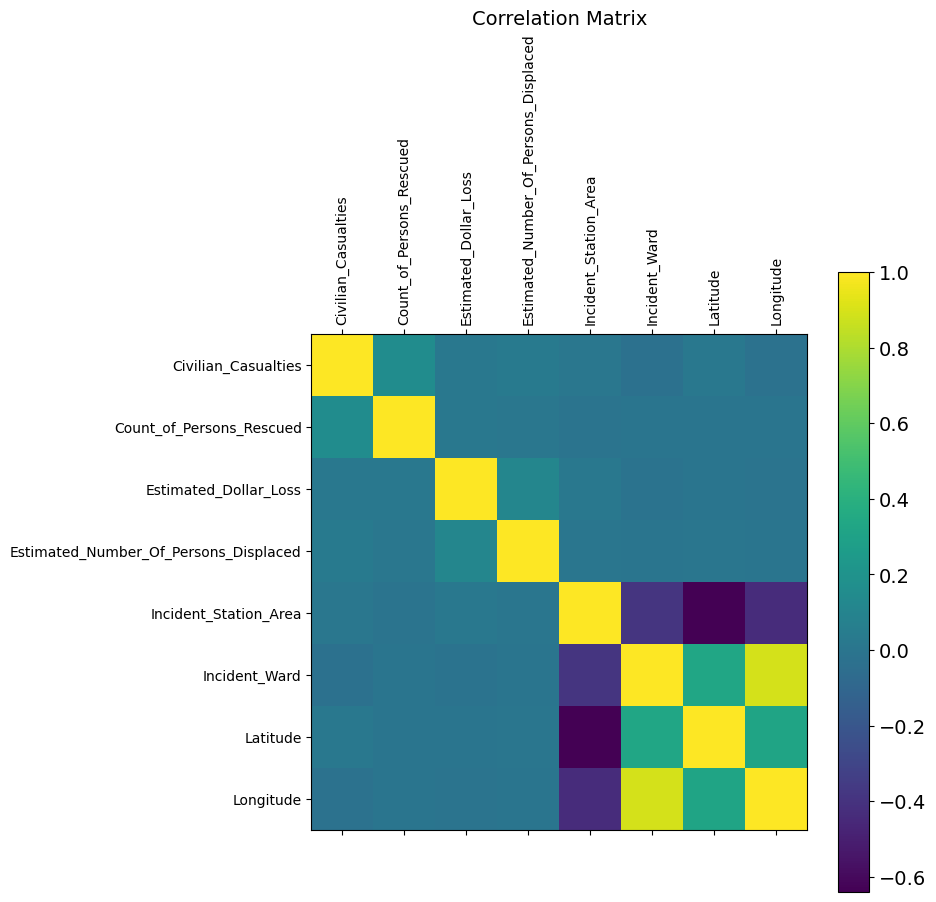

In [83]:
# add labels, a legend and change the size of the heatmap

map = plt.figure(figsize =(8,8))
plt.matshow(numeric_tfire.corr(), fignum = map.number)
plt.xticks(range(numeric_tfire.shape[1]), numeric_tfire.columns, fontsize =10, rotation=90)
plt.yticks(range(numeric_tfire.shape[1]), numeric_tfire.columns, fontsize =10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize=14)

### Create correlation heat map

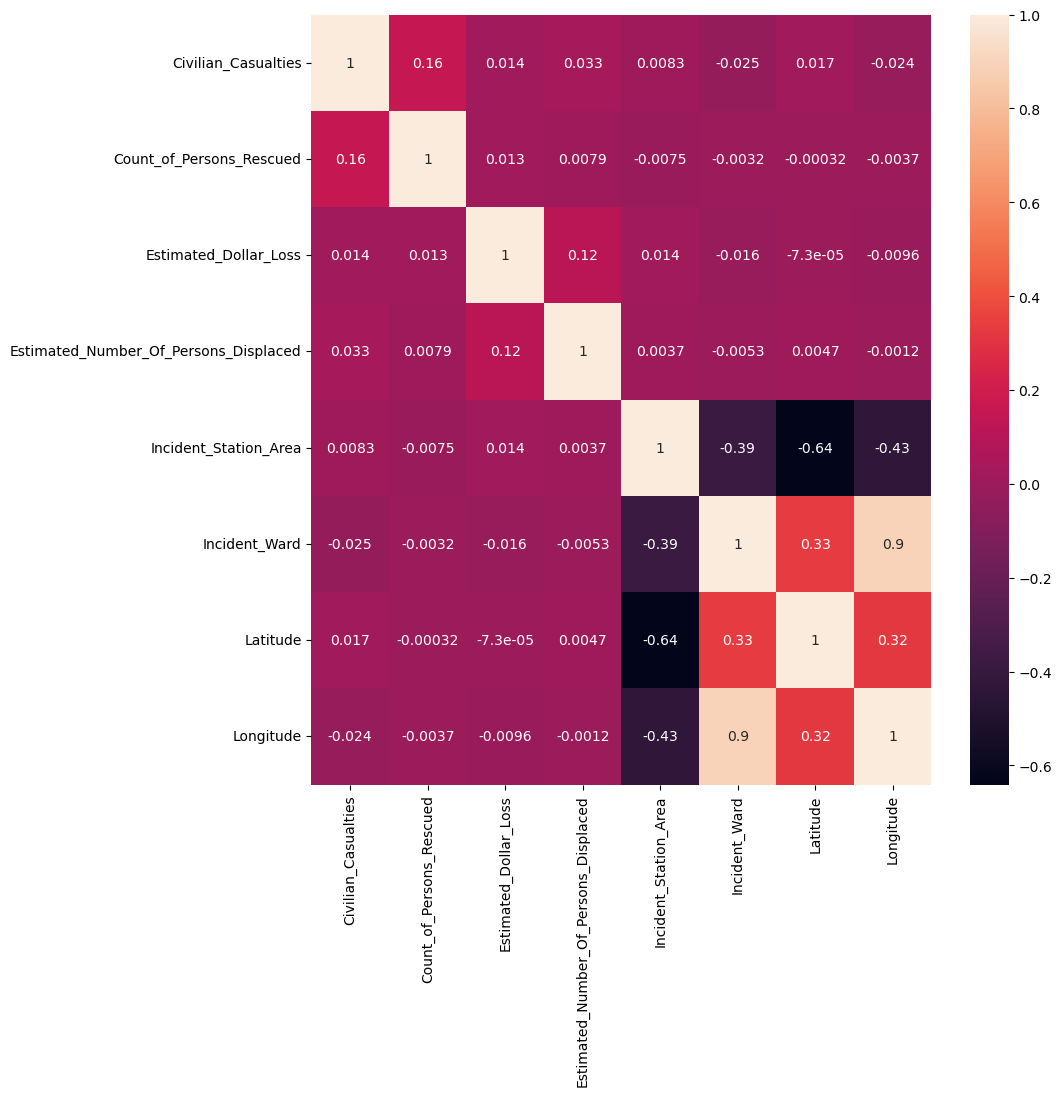

In [88]:
# create a subplot with matplotlib

map,ax = plt.subplots(figsize=(10,10))

#create the correlation heatmap

corr = sns.heatmap(numeric_tfire.corr(), annot = True, ax = ax)


##### There are no meaningful, clear correlations found between numerical values in the dataset

### Create pair plots

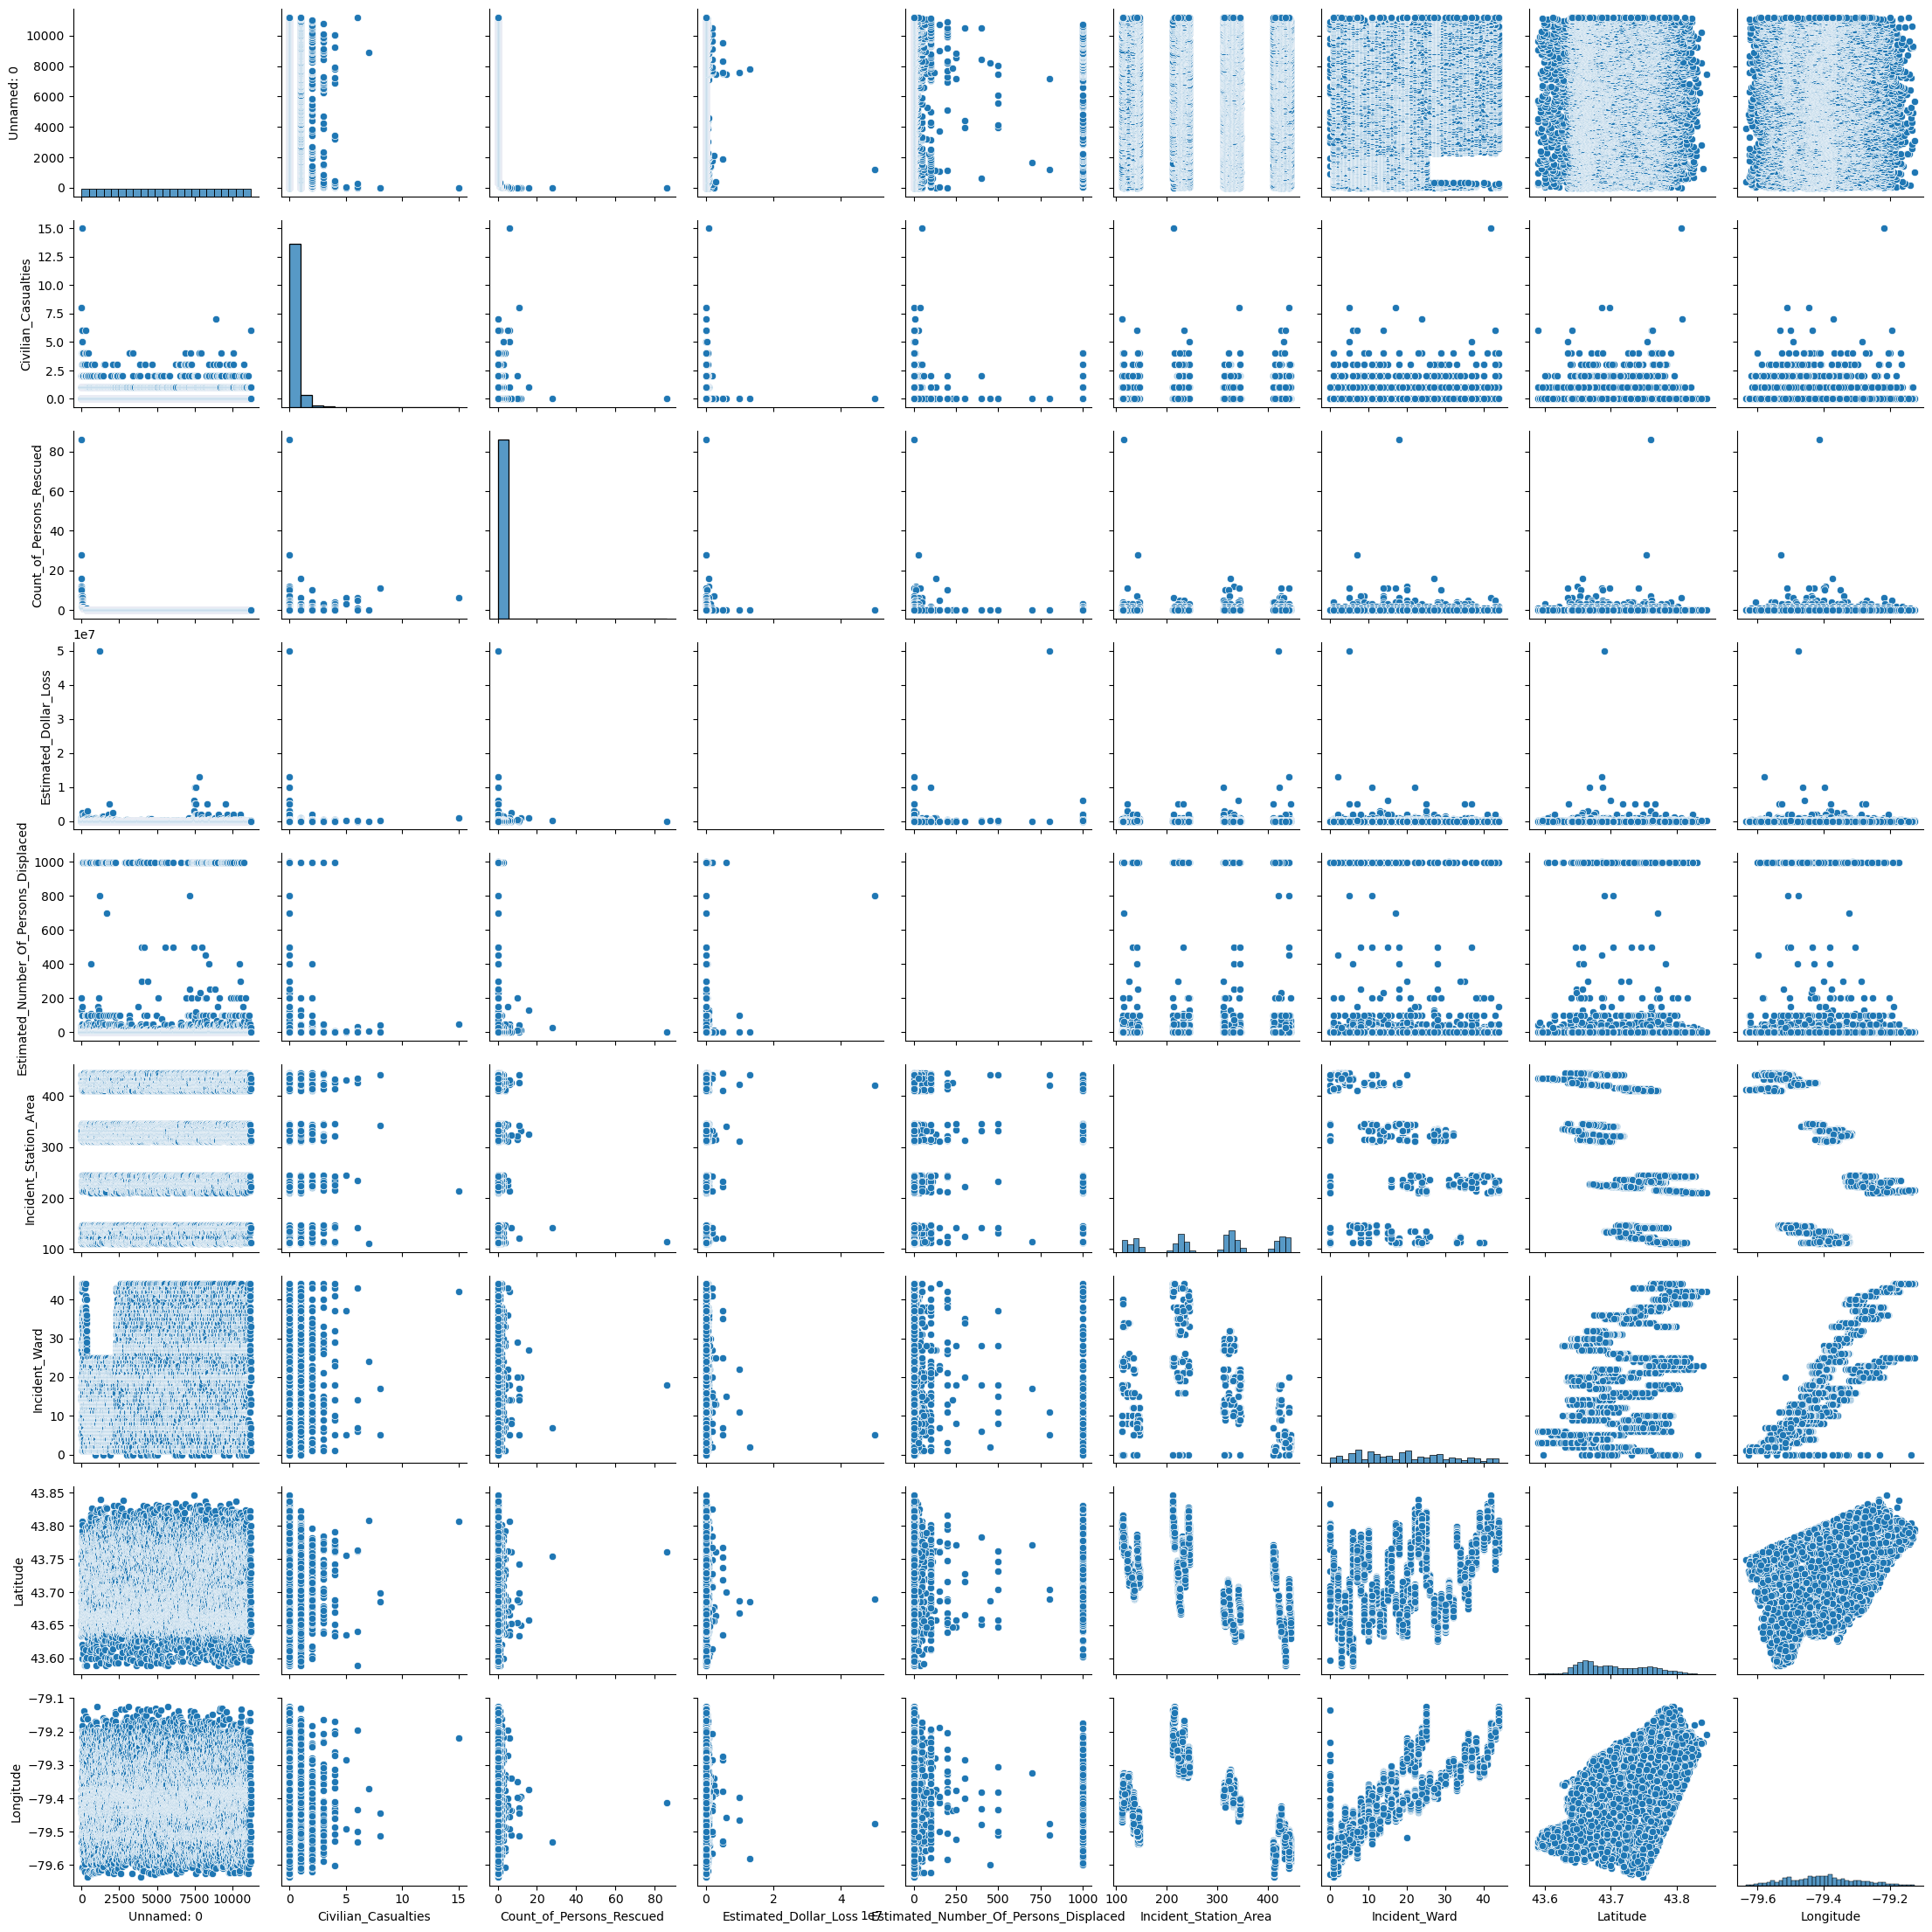

In [100]:
pp = sns.pairplot(tfire)

#### No clear trends visible

### Catergorical plots

Distribution of estimated number of persons displaced variables

(0.0, 500.0)

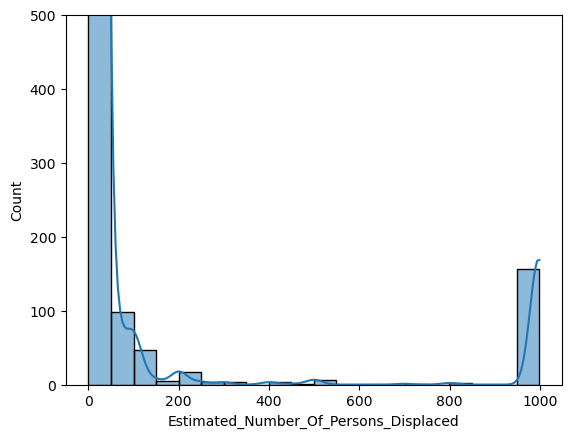

In [145]:
sns.histplot (tfire['Estimated_Number_Of_Persons_Displaced'], bins =20,kde = True)
plt.ylim(0, 500)

##### Create 3 catogories of displacement level

In [153]:
tfire.loc[tfire['Estimated_Number_Of_Persons_Displaced'] < 50, 'displacement_level'] = 'low'

In [155]:
tfire.loc[(tfire['Estimated_Number_Of_Persons_Displaced'] >= 50) & (tfire['Estimated_Number_Of_Persons_Displaced'] <400), 'displacement_level'] = 'medium' 

In [159]:
tfire.loc[tfire['Estimated_Number_Of_Persons_Displaced'] >=400, 'displacement_level'] ='high'

In [161]:
#check values are reasonably spread

tfire['displacement_level'].value_counts(dropna=False)

displacement_level
low       10871
medium      173
high        170
Name: count, dtype: int64

##### create categorical plot using displacement levels as defined above

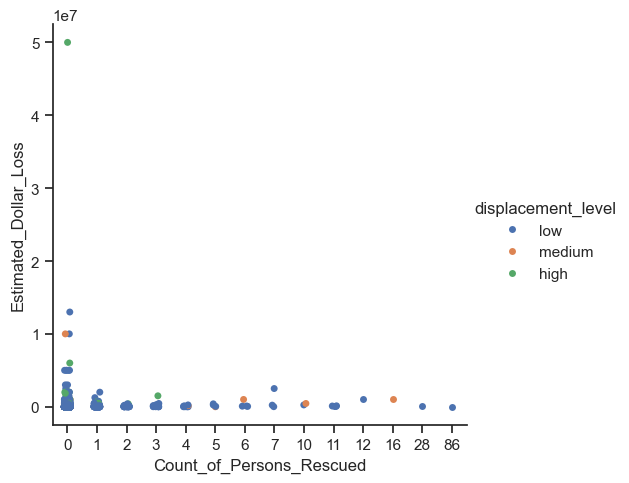

In [165]:
sns.set(style = 'ticks')
graph = sns.catplot(y = 'Estimated_Dollar_Loss', x = 'Count_of_Persons_Rescued', hue = 'displacement_level', data = tfire)

##### again nothing of any significance to mention. In order to properly use the data the various columns for response time and status of fire alarms and actions taken will need to be catergorised. This will be done in a seperate script 

In [171]:
# export image

graph.savefig('fireplots.png')